In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/carprices/CarPrice_Assignment.csv


In [2]:
data=pd.read_csv("/kaggle/input/carprices/CarPrice_Assignment.csv")

In [3]:
data.head()
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
data['fueltype'].replace({'gas':2,'diesel':1},inplace=True)
data['doornumber'].replace({'two':2,'four':4},inplace=True)
data['enginelocation'].replace({'front':1000,'rear':2000},inplace=True)
print(data['carbody'].unique())
data['carbody'].replace({'convertible':8,'hatchback':3,'sedan':3,'wagon':5,'hardtop':6},inplace=True)
print(data['fuelsystem'].unique())
data['fuelsystem'].replace({'mpfi':1,'idi':2,'2bbl':3,'mfi':4,'1bbl':5,'spfi':6,'4bbl':7,'spdi':8},inplace=True)
data['aspiration'].replace({'std':1,'turbo':2},inplace=True)
print(data['cylindernumber'].unique())
data['cylindernumber'].replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12},inplace=True)
print(data['drivewheel'].unique())
data['drivewheel'].replace({'rwd':1,'fwd':2,'4wd':3},inplace=True)
data['enginetype'].replace({'dohc':4,'dohcv':4,'ohc':2,'l':1,'rotor':1,'ohcv':3,'ohcf':3},inplace=True)
data

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['rwd' 'fwd' '4wd']


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,2,1,2,8,1,1000,88.6,...,130,1,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,2,1,2,8,1,1000,88.6,...,130,1,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,2,1,2,3,1,1000,94.5,...,152,1,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,2,1,4,3,2,1000,99.8,...,109,1,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,2,1,4,3,3,1000,99.4,...,136,1,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),2,1,4,3,1,1000,109.1,...,141,1,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,2,2,4,3,1,1000,109.1,...,141,1,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,2,1,4,3,1,1000,109.1,...,173,1,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,1,2,4,3,1,1000,109.1,...,145,2,3.01,3.40,23.0,106,4800,26,27,22470.0


In [6]:
data.drop(['CarName','car_ID'],axis=1,inplace=True)
data.drop(['carbody','enginetype','doornumber','symboling','compressionratio','peakrpm','stroke','carheight','fueltype','aspiration'],axis=1,inplace=True)
data


,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,1,1000,88.6,168.8,64.1,2548,4,130,1,3.47,111,21,27,13495.0
1,1,1000,88.6,168.8,64.1,2548,4,130,1,3.47,111,21,27,16500.0
2,1,1000,94.5,171.2,65.5,2823,6,152,1,2.68,154,19,26,16500.0
3,2,1000,99.8,176.6,66.2,2337,4,109,1,3.19,102,24,30,13950.0
4,3,1000,99.4,176.6,66.4,2824,5,136,1,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,1000,109.1,188.8,68.9,2952,4,141,1,3.78,114,23,28,16845.0
201,1,1000,109.1,188.8,68.8,3049,4,141,1,3.78,160,19,25,19045.0
202,1,1000,109.1,188.8,68.9,3012,6,173,1,3.58,134,18,23,21485.0
203,1,1000,109.1,188.8,68.9,3217,6,145,2,3.01,106,26,27,22470.0


In [7]:
def normalization(x):
    X_norm = (X - np.mean(X))/np.std(X)
    mu = np.mean(X)
    sigma = np.std(X)
    return X_norm, mu, sigma

In [8]:
def cost(X,y, theta):
    
    m  = len(y)
    h = X.dot(theta) ## The hypothesis
    J = 1/(2*m)*(np.sum((h-y)**2)) ## Implementing the cost function
    return J

In [9]:

data_n=data.values
m=len(data_n[:,-1])
X=data_n[:,0:13].reshape(m,13)
X , mean_X , std_X = normalization(X)
X = np.append(np.ones((m,1)),X,axis=1)
y=data_n[:,-1].reshape(m,1)
theta=np.zeros([14,1])
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cost(X,y,theta)


117248265.98628049

In [10]:
def gradient_descent(X, y, theta, lr, iters):
    
    cost_history = []
  
    m = len(y) 
    for i in range(iters): 
        h = X.dot(theta) 
        theta = theta - (lr/m)*(X.T.dot(h-y)) ## Grad.desc.func.
        cost_history.append(cost(X, y, theta))
    return h,theta, cost_history

In [11]:
y_pred,new_theta,cost_history=gradient_descent(X,y,theta,0.125,9000)
new_theta

array([[  590.12145375],
       [ -557.0829272 ],
       [ 9932.1330849 ],
       [  642.03650466],
       [ -718.33904862],
       [ 1764.8972681 ],
       [ 5411.0861845 ],
       [ 1018.15004456],
       [30486.4656347 ],
       [-1171.31663435],
       [ -372.53492393],
       [22383.13848195],
       [-1877.24638954],
       [-1657.72937411]])

In [12]:
#print("h(x)="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1 + "+str(round(theta[2,0],2))+"x2")

In [13]:
new_cost = cost(X,y,new_theta)
print(new_cost)


4667531.082019818


Text(0.5, 1.0, 'Minimizing Cost Using Gradient Descent')

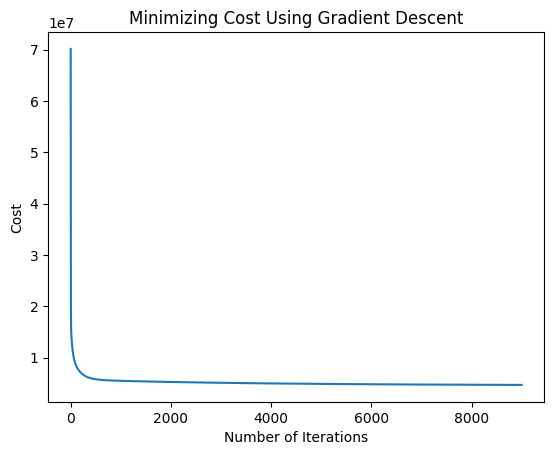

In [14]:
plt.plot(cost_history)
plt.ylabel('Cost')
plt.xlabel('Number of Iterations')
plt.title('Minimizing Cost Using Gradient Descent')

In [15]:
new_cost = cost(X,y,new_theta)
print(new_cost)

4667531.082019818


In [16]:
from sklearn.metrics import r2_score
r2=r2_score(y_pred,y)
print(r2*100,"%")

81.12320548011421 %


In [17]:
Y_test=np.dot(X_test,new_theta)
Y_test.shape

(41, 1)

In [18]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,y_test)
print(r2*100,"%")

68.82147095566944 %
